# Business Decisions
General project

# Import liabraries & create DataFrames to csv files


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
hypotheses = pd.read_csv('/content/hypotheses_us.csv',sep=';')
# hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',sep=';')

orders = pd.read_csv('/content/orders_us.csv',parse_dates=['date'])
# orders = pd.read_csv('/datasets/orders_us.csv',parse_dates=['date'])

visits = pd.read_csv('/content/visits_us.csv',parse_dates=['date'])
# visits = pd.read_csv('/datasets/visits_us.csv',parse_dates=['date'])
# pd.set_option('max_colwidth', None)

# Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.


In [3]:
# quick look into hypotheses frame:
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


__•	Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.__

reminder to ICE formula:
ICE = impact * confidence / efforts

In [4]:
# new Ice col:
hypotheses['Ice'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

In [5]:
hypotheses.sort_values(by='Ice',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,Ice
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


__•	Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.__

reminder to RICE formula:
RICE = (reach * impact * confidence) / efforts

In [6]:
# new Rice col:
hypotheses['Rice'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

In [7]:
hypotheses.sort_values(by='Rice',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,Ice,Rice
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


__•	Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.__

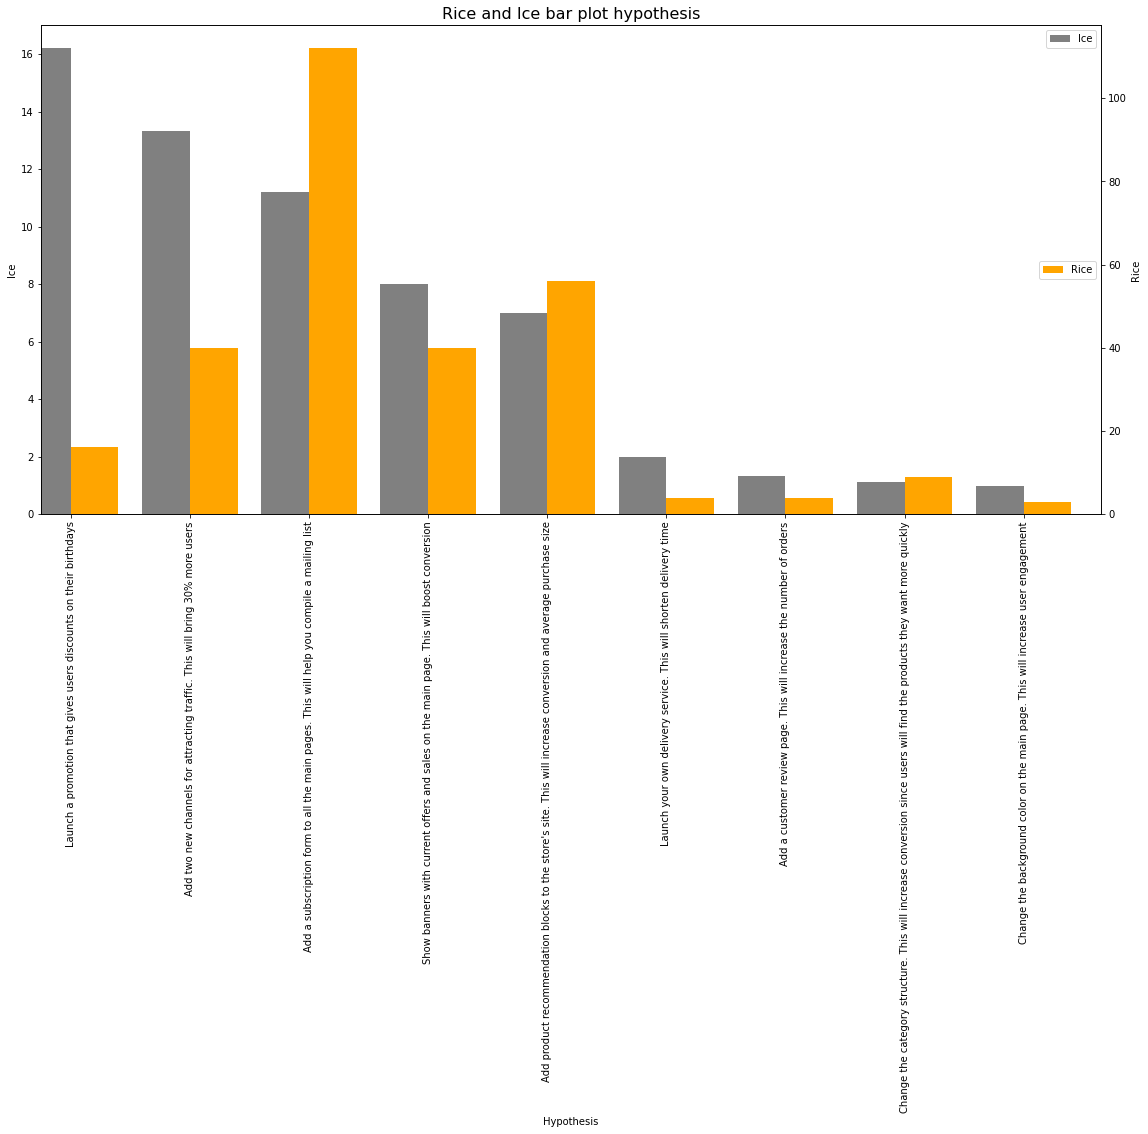

In [8]:
fig = plt.figure(figsize=(19,9),facecolor='white')

ax = fig.add_subplot(111)
ax2 = ax.twinx() 

width = 0.4
hypotheses = hypotheses.sort_values(by='Ice',ascending=False)
hypotheses.set_index('Hypothesis').Ice.plot(kind='bar', color='grey', ax=ax, width=width, position=1,label='Ice')
hypotheses.set_index('Hypothesis').Rice.plot(kind='bar', color='orange', ax=ax2, width=width, position=0,label='Rice')

plt.title('Rice and Ice bar plot hypothesis',fontdict={'size':16})
ax.set_ylabel('Ice')
ax2.set_ylabel('Rice')
ax.legend()
ax2.legend(loc=7)
plt.show()

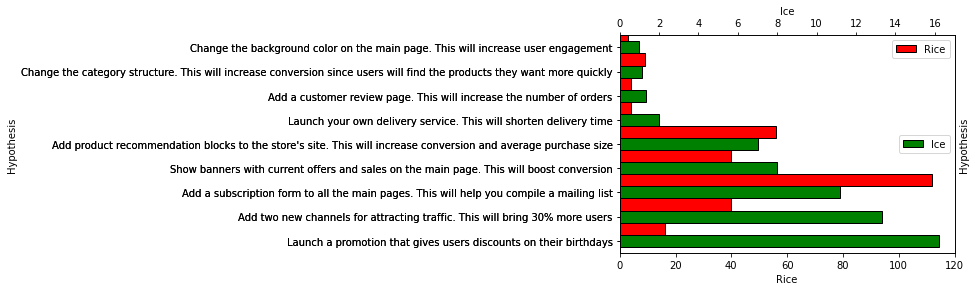

In [9]:
# Create figure and axes for Ice & Rice
fig,axt = plt.subplots(1)

# Plot Rice on axt
hypotheses.set_index('Hypothesis').Rice.plot.barh(color='red',edgecolor='k',align='edge',ax=axt,legend=False,position=0)

# # Create twin axes
axb = axt.twiny()

# Plot ICE on axb
hypotheses.set_index('Hypothesis').Ice.plot.barh(color='green',edgecolor='k',align='edge',ax=axb,legend=False,position=1)

# Set some sensible axes limits
axt.set_xlim(0,120)
axb.set_xlim(0,17)

# Add some x_axes labels
axt.set_xlabel('Rice')
axb.set_xlabel('Ice')

# Need to manually move axb label to right hand side 
axb.yaxis.set_label_position('right')
# manually move legends:
axt.legend()
axb.legend(loc=5)
plt.show()


the main impact on the change between Ice / Rice is the fact that another numerator added which makes the evaluation of the hypothesis to deffer. inserting another condition has an impact because another scale of numbers is now having an effect on the final score


going with ICE version we should probably start with 'Launch a promotion that gives users discounts on their birthdays' hypothesis since the score was the highest. ICE importance derives from the impact & confidance in the numirator only.
    easy to notice that if we add the Reach coefficient the results are going other way and this specific hypotheses get a different rating. its Reach coefficiant is lower compated to other hypotheses wher e 'Add a subscription form to all the main pages. This will help you compile a mailing list' receive the higest prority if we going with RICE method


# Part 2. A/B Test Analysis


visits:

In [10]:
# quick first look:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visits.info()
# adjustment done already in the start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [12]:
visits.describe()
# seems no problem till now - ok

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [13]:
visits.describe(include=['datetime64[ns]','category'])
# ok here

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date
count,62
unique,31
top,2019-08-02 00:00:00
freq,2
first,2019-08-01 00:00:00
last,2019-08-31 00:00:00


In [14]:
visits.isna().sum()
# no NaN values

date      0
group     0
visits    0
dtype: int64

In [15]:
# just in case:
visits.drop_duplicates(inplace=True)

In [16]:
# one more look here
visits.sort_values(by='visits')

,date,group,visits
15,2019-08-16,A,361
40,2019-08-10,B,369
54,2019-08-24,B,378
23,2019-08-24,A,395
9,2019-08-10,A,406
...,...,...,...
44,2019-08-14,B,746
12,2019-08-13,A,748
4,2019-08-05,A,756
43,2019-08-13,B,769


In [17]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
# check: if same date is more than 2 times:
visits['date'].value_counts()

2019-08-02    2
2019-08-05    2
2019-08-21    2
2019-08-15    2
2019-08-09    2
2019-08-03    2
2019-08-28    2
2019-08-22    2
2019-08-16    2
2019-08-10    2
2019-08-04    2
2019-08-29    2
2019-08-23    2
2019-08-17    2
2019-08-11    2
2019-08-30    2
2019-08-08    2
2019-08-24    2
2019-08-18    2
2019-08-12    2
2019-08-06    2
2019-08-31    2
2019-08-25    2
2019-08-19    2
2019-08-13    2
2019-08-07    2
2019-08-01    2
2019-08-26    2
2019-08-20    2
2019-08-14    2
2019-08-27    2
Name: date, dtype: int64

In [19]:
# try to detect dupps: no change in the final rows count - ok here
visits.drop('visits',axis=1).drop_duplicates()

,date,group
0,2019-08-01,A
1,2019-08-02,A
2,2019-08-03,A
3,2019-08-04,A
4,2019-08-05,A
...,...,...
57,2019-08-27,B
58,2019-08-28,B
59,2019-08-29,B
60,2019-08-30,B


_finish prepare the visits table - looks ok_

orders

In [20]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [21]:
orders.info()
# adjusments made in the start

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [22]:
orders.describe(include=['datetime64[ns]','category'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date
count,1197
unique,31
top,2019-08-05 00:00:00
freq,48
first,2019-08-01 00:00:00
last,2019-08-31 00:00:00


In [23]:
orders['revenue'].describe()
# seems like big outlier 19920. not even close to the median (it will be handled further in the project)

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

<div class="alert alert-info"> <b>1st review:</b> check if some visitors got into both groups (start):</div>

In [24]:
orders.pivot_table(index='visitorId',columns='group',values='transactionId',aggfunc=['count']).dropna().reset_index().count()
# we got 58 visitors in BOTH groups
# next I will delete theses specific users from original orders df

           group
visitorId           58
count      A        58
           B        58
dtype: int64

In [25]:
orders_in_ab = orders.pivot_table(index='visitorId',columns='group',values='transactionId',aggfunc=['count']).dropna().reset_index()['visitorId']

In [26]:
# remove visitors who are in both groups:
orders = orders.query('visitorId not in @orders_in_ab') 
# total rows removed = 181

conclusions:
- form a describe mothed we receive our first notice that the max value might be an outstanding revenue (19920) while in the highest 3/4 the revenue us only 130.
- very high max revenue impact our std and mean values (skewness) another good indicator is the fact that: mean > 3/4 quartile.. classic skewness
- total of 181 removed which is more than 15% but we didnt have a choice sinced we do need our A/B test to be as

## 1.	Graph cumulative revenue by group. Make conclusions and conjectures.

In [27]:
# look in the dataframe:
orders.head(1)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


next we start building cumulative data by groups

In [28]:
# first we get unique dates for each group and store it to a new variable as a new df
dates_groups = orders[['date','group']].drop_duplicates() 

In [29]:
# agg cumulative data for orders table using unique dates 
orders_agg = (dates_groups.apply(lambda x: 
                               orders[np.logical_and(orders['date'] <= x['date'], 
                                                     orders['group'] == x['group'])].agg({
                                                                                        'date':'max',
                                                                                        'group':'max', 
                                                                                        'transactionId':'nunique', 
                                                                                        'visitorId':'nunique',
                                                                                        'revenue':'sum'
                                                                                        }),
                                 axis=1).sort_values(by=['date','group']))

In [30]:
# look at what we got:
orders_agg.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


In [31]:
# the same to visits table:
visits_agg = (dates_groups
                    .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                    .agg({'date':'max','group':'max', 'visits':'sum'}), axis=1).sort_values(by=['date','group']))

In [32]:
# quick look:
visits_agg.head(5)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [33]:
# orders_agg + visits_agg into one data frame:
orders_visits_agg = orders_agg.merge(visits_agg,on=['date', 'group'])

In [34]:
# rename columns
orders_visits_agg.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [35]:
# a look:
orders_visits_agg.tail(5)

,date,group,orders,buyers,revenue,visitors
57,2019-08-29,B,510,490,74576.7,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,531,511,77863.5,18198
60,2019-08-31,A,468,445,53212.0,18736
61,2019-08-31,B,548,528,79651.2,18916


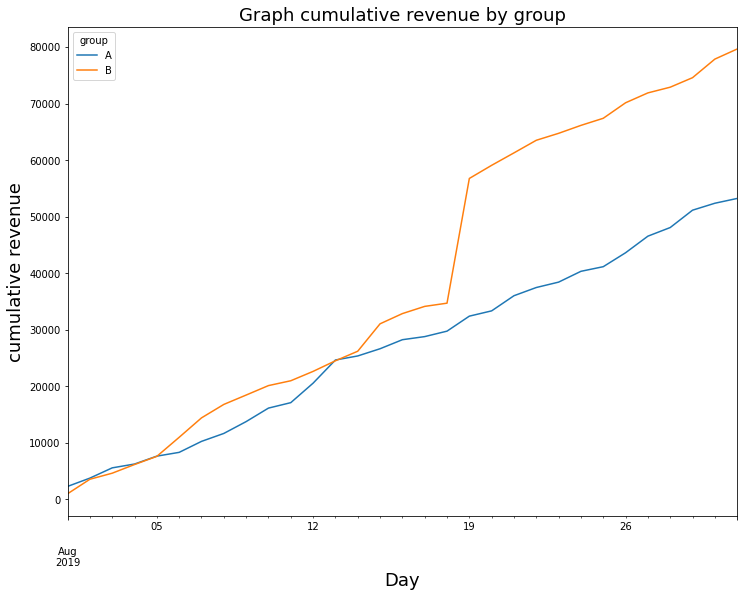

In [36]:
# plot revenue by group:
orders_visits_agg.pivot('date','group','revenue').plot(figsize=(12,9))
plt.title('Graph cumulative revenue by group',fontsize=18)
plt.xlabel('Day',fontsize=18)
plt.ylabel('cumulative revenue',fontsize=18)
plt.show()

results:
- in the middle of the test between the groups we can norice for a big jump in group B
- stabiity noticed with group A through all the test while group B had one time jump
- seems that an outlier caused the difference within group B. without the the 'one time' thing we should probably seen group B and A much more similiar

## 2.	Graph cumulative average order size by group. Make conclusions and conjectures.

In [37]:
# add new col with avg price to orders:
orders_visits_agg['avg_purchase'] = orders_visits_agg['revenue'] / orders_visits_agg['orders']

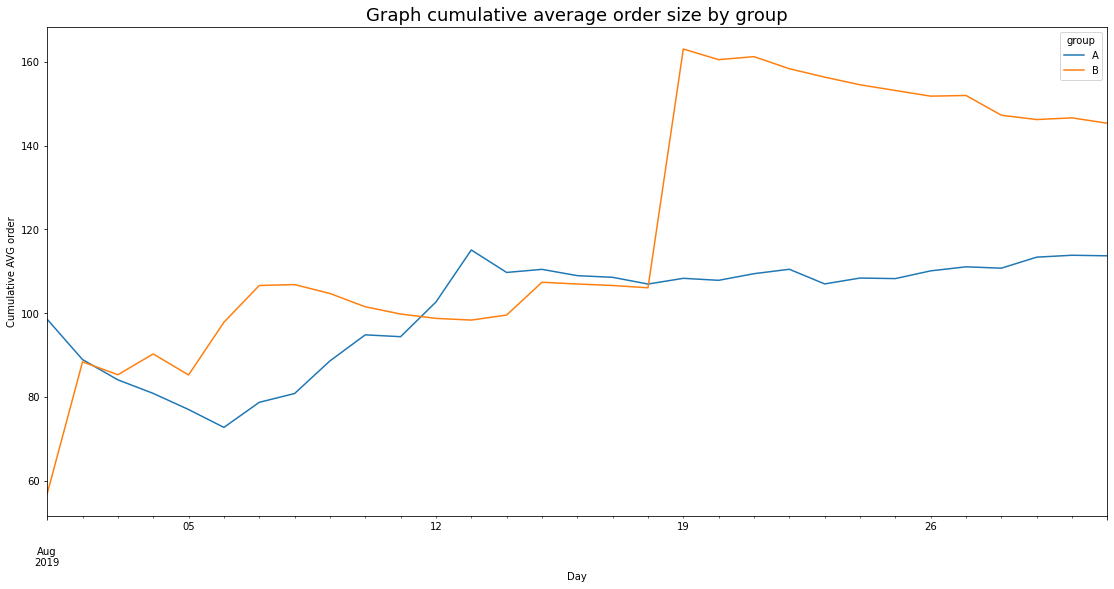

In [38]:
# plot on graph:
orders_visits_agg.pivot('date','group','avg_purchase').plot(figsize=(19,9))
plt.title('Graph cumulative average order size by group',fontsize=18)
plt.xlabel('Day')
plt.ylabel('Cumulative AVG order')
plt.show()

result:
- start of the test characterized with unconsistancy between the groups and it is noted in the graph.
- a big jump in group B is followed here as well which is already was seen in the previous graph
- overall, when disregard the big junp in revenue in group B and the start which is known with more variance: group A stabled from the middle on the month and even has a low increase while group B has declination aftfer the big jump
- the disregard the outliers, group A would probably lead by more better figures

## 3.	Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [39]:
# making table with orders and revenue as a cloumns for each group
# step 1 - new variable using pivot:
relat_orders_visits_agg = orders_visits_agg.pivot_table(index='date',columns='group',values=['revenue','orders'],aggfunc='sum').reset_index()

In [40]:
# step 2 - columns names adjustment:
relat_orders_visits_agg.columns = [''.join(col).strip() for col in relat_orders_visits_agg.columns.values]

In [41]:
relat_orders_visits_agg.head(5)
# ok here

,date,ordersA,ordersB,revenueA,revenueB
0,2019-08-01,23,17,2266.6,967.2
1,2019-08-02,42,40,3734.9,3535.3
2,2019-08-03,66,54,5550.1,4606.9
3,2019-08-04,77,68,6225.6,6138.5
4,2019-08-05,99,89,7623.6,7587.8


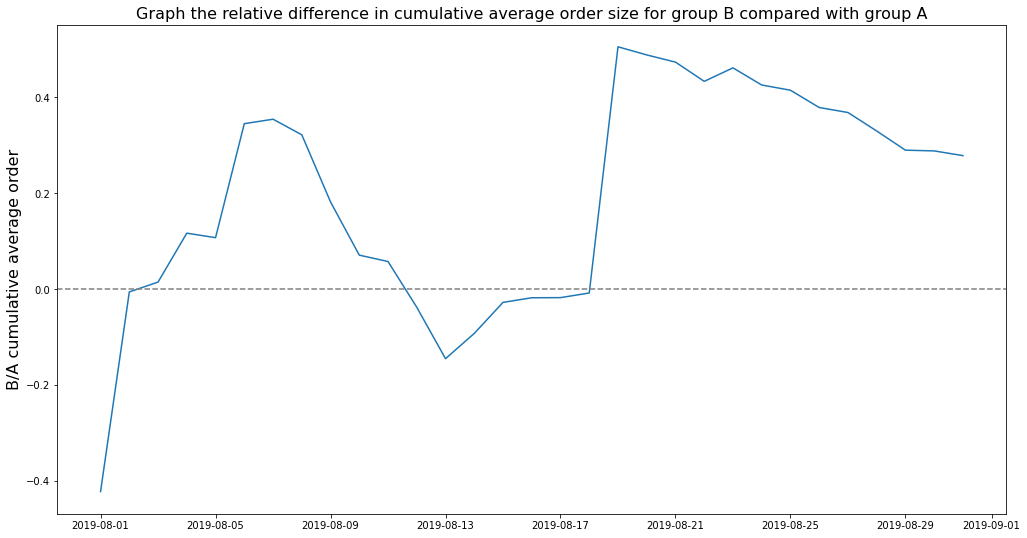

In [42]:
# plotting :
plt.figure(figsize=(17,9),facecolor='white')
plt.plot(
    relat_orders_visits_agg['date'], 
    (relat_orders_visits_agg['revenueB']/relat_orders_visits_agg['ordersB'])/(relat_orders_visits_agg['revenueA']/relat_orders_visits_agg['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='grey', linestyle='--') 
plt.ylabel('B/A cumulative average order',fontsize=16)
plt.title('Graph the relative difference in cumulative average order size for group B compared with group A',fontsize=16)
plt.show()

results:
- graph correlated to the previous graphs and showing the same picture from another point of view
- one more indication to existing oulier within group B which impact to average size of B/A

## 4.	Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [43]:
# new conversion col:
orders_visits_agg['conversion'] = orders_visits_agg['orders']/orders_visits_agg['visitors']

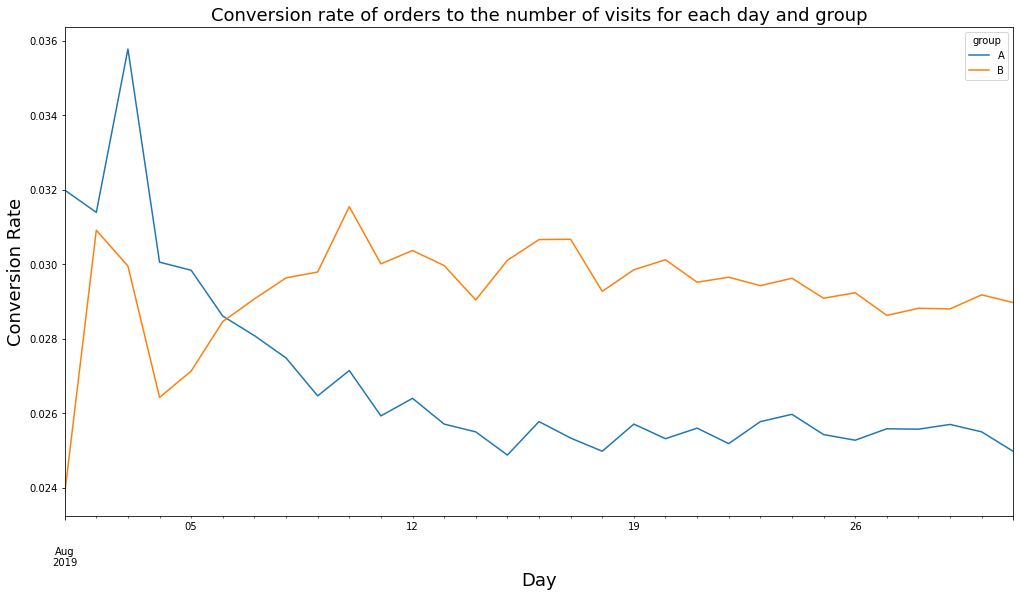

In [44]:
# pivot and plot:
orders_visits_agg.pivot('date','group','conversion').plot(figsize=(17,9))
plt.title('Conversion rate of orders to the number of visits for each day and group',fontsize=18)
plt.xlabel('Day',fontsize=18)
plt.ylabel('Conversion Rate',fontsize=18)
plt.show()

results:
- The start is unstable but trends are shown good after
- Group B shows better preformances conversion rates
- in this case we can assume that the revenues of B should be higher than A (indicators are in the previous revenue graphs)

## 5.	Plot a scatter chart of the number of orders per user. conclusions and conjectures.
## 6.	Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [45]:
# create unique orders foe user
orders_users = orders.drop(['date','revenue','group'],axis=1).groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})

In [46]:
# col rename:
orders_users.columns = ['visitorId','n_orders']

In [47]:
orders_users = orders_users.sort_values(by='n_orders',ascending=False)

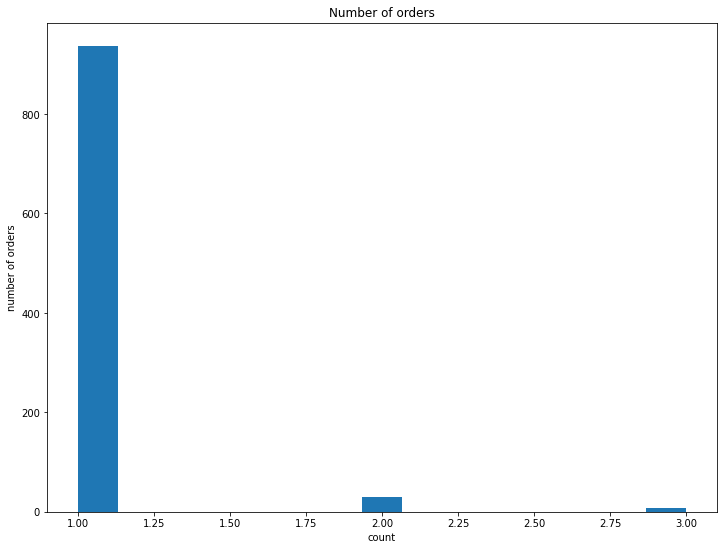

In [48]:
### hist:
plt.figure(figsize=(12,9),facecolor='white')
plt.hist(orders_users['n_orders'],bins=15)
plt.title('Number of orders')
plt.xlabel('count')
plt.ylabel('number of orders')
plt.show()


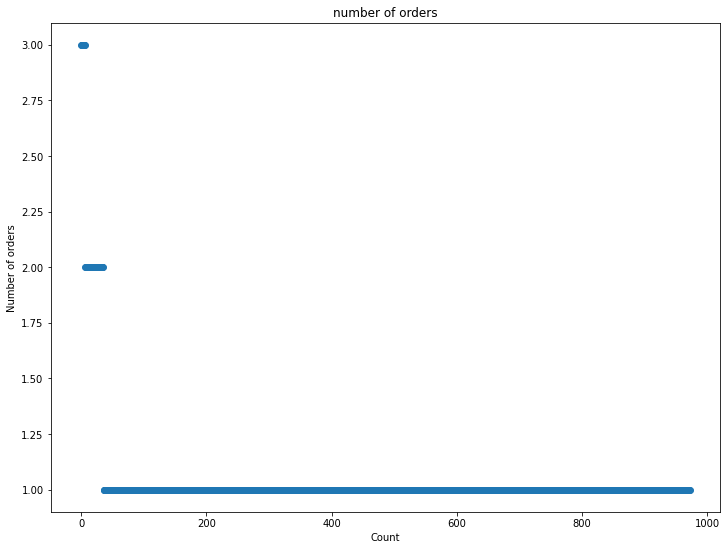

In [49]:
# scatter plot:
plt.figure(figsize=(12,9),facecolor='white')
plt.scatter(range(0,len(orders_users)),orders_users['n_orders'])
plt.ylabel('Number of orders')
plt.xlabel('Count')
plt.title('number of orders')
plt.show()

- majority of the visitores place 1 order
- small number of users has more than 1 orders (2-3)
- from 2-5 orders placed is is about 100 orders in total (THIS RELATES TO PREVIOUS SUBMISION - PLEASE DISREGARD THIS NOTE - WAS WRITTEN BEFORE LATE ADJUSTMENTS HERE)

In [50]:
np.percentile(orders_users['n_orders'],[95,99])

array([1., 2.])

- Anomaly is in the last percent which is after 4 purchases by user
- when looking at the scatter plot above we may take the 5th in count as well and probably disregard the rest of the last percentile


<b>conclusion </b>

Anomally point is where the data is getting distorted by and impacting the rest of the sample by getting a bias conclusions and graphs.

this time (afther the adjustments done earlier in the -users in both groups- section we can notice that the anomally percent is very low this time and more than 99% of the sample seems to be in good order.
- as we see in our hist and scatter plot we can easily notice that most of the users are with one purchase 
- very few has 2 purchases
- we can consider 3 purchase as anomally in this case [which is less than 1%]</div>

## 7.	Plot a scatter chart of order prices. Make conclusions and conjectures.
## 8.	Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

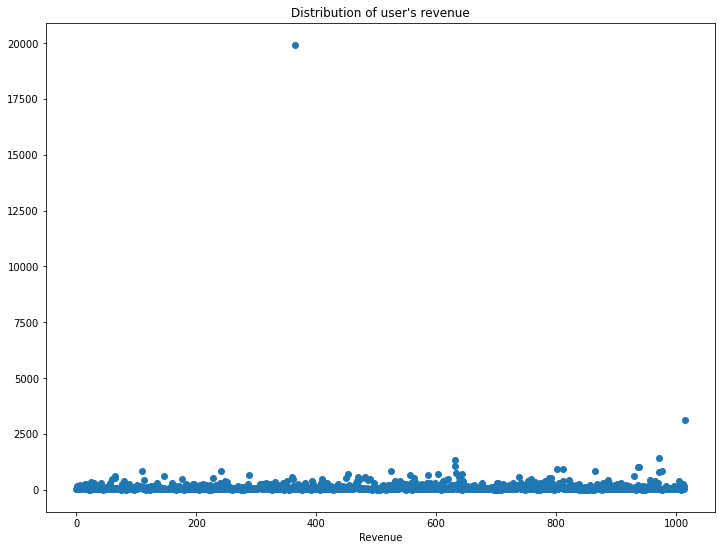

In [51]:
plt.figure(figsize=(12,9),facecolor='white')
plt.scatter(range(0,len(orders)),orders['revenue'])
plt.xlabel('User')
plt.xlabel('Revenue')
plt.title('Distribution of user\'s revenue')
plt.show()

In [52]:
# 95 & 99 percentile:
np.percentile(orders['revenue'],[95,99])

array([414.275, 830.3  ])

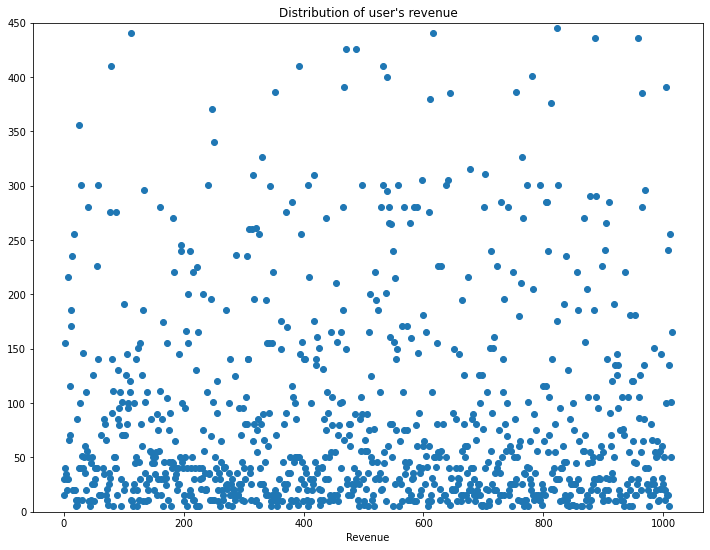

In [53]:
# additional quick look into the distribution into the 95% percentiles:
plt.figure(figsize=(12,9),facecolor='white')
plt.scatter(range(0,len(orders)),orders['revenue'])
plt.xlabel('User')
plt.xlabel('Revenue')
plt.title('Distribution of user\'s revenue')
plt.ylim([0, 450])
plt.show()

- last 5 percntiles in revenue column are probably outliers and impacting the results sighnifically. that is where anomaly starts
- the highest figures are the ones that cause a massive skweness to the distribution the revenues and cousing a big distortion
- when looking at only the first 95 percentiles the distribution looks better and proportions are looks good
- the anomalies probably comes from a glitch in the output of the data or caused by a typo mistakes

## 9.	Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

_alpha = 0.05_


```
H0: μ0 = μ1 \ mean conversion rate of Group A is equal to Group B

H1: μ0 ≠ μ1 \ mean conversion rate of Group A is not equal to Group B
```


__if p-value is less than alpha we reject hypothesis__

In [54]:
# users for each varaible group with number of orders: 
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsersB.columns = ['visitorId', 'orders']


In [55]:
# concat orders of group A with users without any oders (=0)
group_a = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],
     axis=0)

In [56]:
# the same concat with group B:
group_b = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],
     axis=0)

In [57]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(group_a, group_b)[1]))
print("relative profit/loss of group A/B: {0:.3f}".format(group_a.mean()/group_b.mean()-1)) 

p-value: 0.006
relative profit/loss of group A/B: -0.138



results:

- p-value = 0.008 which is lower than alpha (= 0.05). So we can reject the null hypothesis that there's  a statistically significant difference in conversion between the groups.
- the relative loss of group A is 12.1% 
- based on the data there is a difference between group A and B

## 10.	Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

_alpha = 0.05_


```
H0: μ0 = μ1 \ mean order size of Group A is equal to Group B

H1: μ0 ≠ μ1 \ mean order size of Group A is not equal to Group B
```


__if p-value is less than alpha we reject hypothesis__

In [58]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("ralative avg. size for group B/A: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.431
ralative avg. size for group B/A: 0.278


result:
- The p-value is  higher than 0.05 so can't reject the null hypothesis and conclude that average order size differs between the groups.
- The average order size for group B isbigger than it is for group A by 27.8%

## 11.	Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


```
H0: μ0 = μ1 \ mean conversion rate of Group A - filtered is equal to Group B - filtered

H1: μ0 ≠ μ1 \ mean conversion rate of Group A - filtered is not equal to Group B - filtered
```


__if p-value is less than alpha we reject hypothesis__

In [59]:
# users with many orders- higher than 4 (last 5 percentiles):
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
# users with expensive orders - higher than 450 (last 5 percentiles):
usersWithExpensiveOrders = orders[orders['revenue'] > 450]['visitorId']
# abnormal users - all the users with abnormal figures defined above:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Total number of anomaly rows: {}'.format(abnormalUsers.shape))

Total number of anomaly rows: (44,)


In [60]:
# getting filtered samples without the anomalies (only the first 95% of the raw data)
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


In [61]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("relative profit/loss of group A/B: {0:.3f}".format(sampleAFiltered.mean()/sampleBFiltered.mean()-1))

p-value: 0.007
relative profit/loss of group A/B: -0.139


results:
- p-value almost without change so the null hypothesis reject is remain
- realative loss of group A without a sgnificant change as well
- conclusion remains the same - there is a difference between the groups

## 12.	Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

_alpha = 0.05_


```
H0: μ0 = μ1 \ mean orders size of Group A - filtered is equal to Group B - filtered

H1: μ0 ≠ μ1 \ mean orders size of Group A - filtered is not equal to Group B - filtered
```


__if p-value is less than alpha we reject hypothesis__

In [62]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("ralative avg. size for group B/A: {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value: 0.442
ralative avg. size for group B/A: -0.029


results:
- The p-value still more than 0.05 and still we unable toreject the null hypothesis and conclude that average order size differs between the groups.
- when droping the outlieres we do notice that in a ralative manners the avg size between the groups are no different anymore (only 2.9% difference) instaed of being more than 20% diffrence before



<b>conclusion [new]: </b>
- reagarding the p-value tests in both filtered and raw data we see no change between the tests which may indicate that the anomally has minor effect in this case
- noticed B/A test diffrences between the raw and filtered data. gaps were reduced between the groupbs when tests wehere applied to the filtered data

## 13.	Make a decision based on the test results. The possible decisions are: 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

__Final conclusion:__

seems that the conclusions are with the same motives through all the graphs and tests from the beginning.

at the beggining we notices about the revenue of group B (big jump-outlier) which impacted continuous graphs results (orders table) which if we were looking by them only our assumptions probably were not good and satisfying enough

after making Wilcoxon-Mann-Whitney p-value test we were able to tell that even when outliers are removed no impact was done on the p-value tests:
visits - group B was undoubtedly a better group with higher retentions rates than group A
orders - no changes between the groups with raw / filtered data sets so on this part there is no better group

after a month of reseach I think the best way is to stop the test and consider group B as a winner if our main goal was getting higer retentions only but when we are take in place revenues as weel here we do not have a concrete result and it is all a matter of time and money investments to decide whether to continue the test a bit more or not


with that been said my decision would probably be to continue the test because we did notied for a conversions to get bigger wihch may impact the revenue on the next period of time and not have been procduced in cuurent month in this area which we probably need more time to get our fruits on this side as well with more time our sagnificance would be better on the revenues side if we would continue the tesst for another